# Synthetic control with sci-kit learn models

In [1]:
import pandas as pd
import pathlib
import arviz as az

In [2]:
az.style.use("arviz-darkgrid")

## Load data

In [3]:
sc_data_path = (
    pathlib.Path.cwd().parents[1] / "causalpy" / "data" / "synthetic_control.csv"
)
df = pd.read_csv(sc_data_path)
treatment_time = 70

## Analyse with `WeightedProportion` model

In [4]:
from causalpy.skl_models import WeightedProportion
from causalpy.skl_experiments import SyntheticControl

# Note, we do not want an intercept in this model
result = SyntheticControl(
    df,
    treatment_time,
    formula="actual ~ 0 + a + b + c + d + e + f + g",
    prediction_model=WeightedProportion(),
)

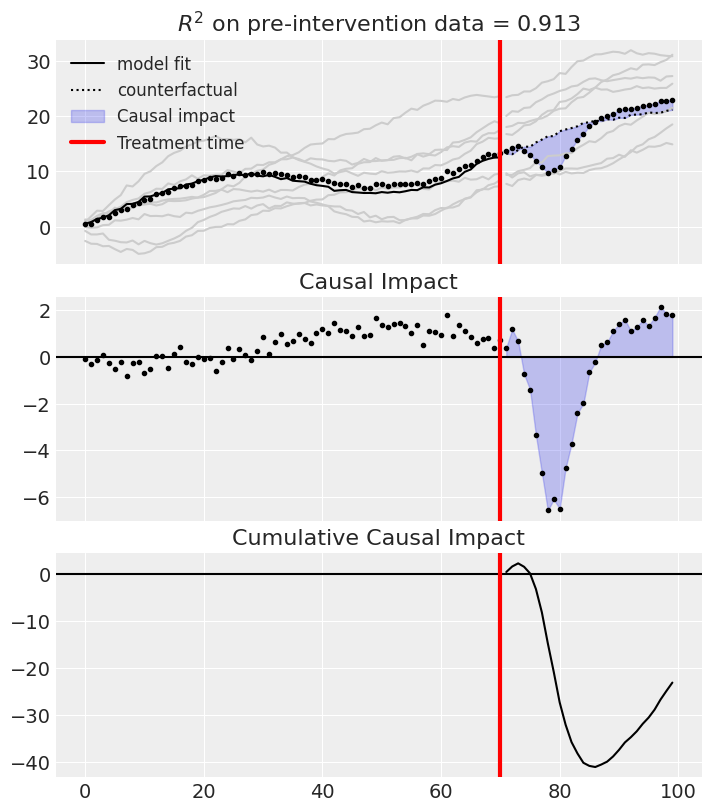

In [5]:
fig, ax = result.plot()

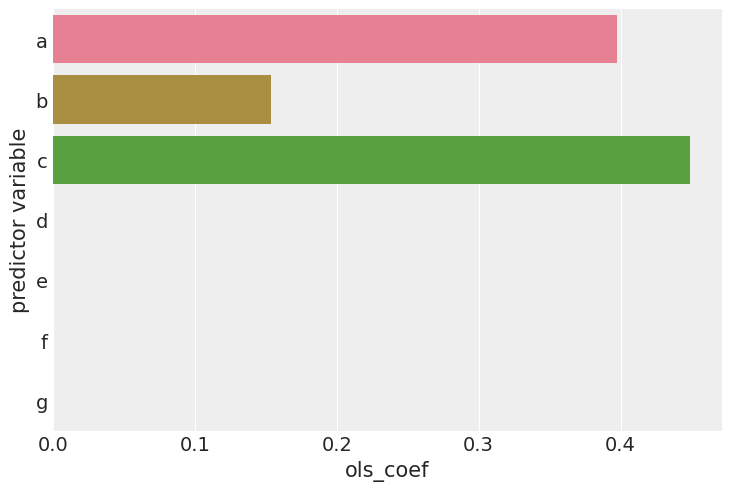

In [6]:
result.plot_coeffs()

But we can see that (for this dataset) these estimates are quite bad. So we can lift the "sum to 1" assumption and instead use the `LinearRegression` model, but still constrain weights to be positive. Equally, you could experiment with the `Ridge` model (e.g. `Ridge(positive=True, alpha=100)`).

## Analyse with the `LinearRegression` model

In [7]:
from causalpy.skl_experiments import SyntheticControl
from sklearn.linear_model import LinearRegression

# Note, we do not want an intercept in this model
result = SyntheticControl(
    df,
    treatment_time,
    formula="actual ~ 0 + a + b + c + d + e + f + g",
    prediction_model=LinearRegression(positive=True),
)

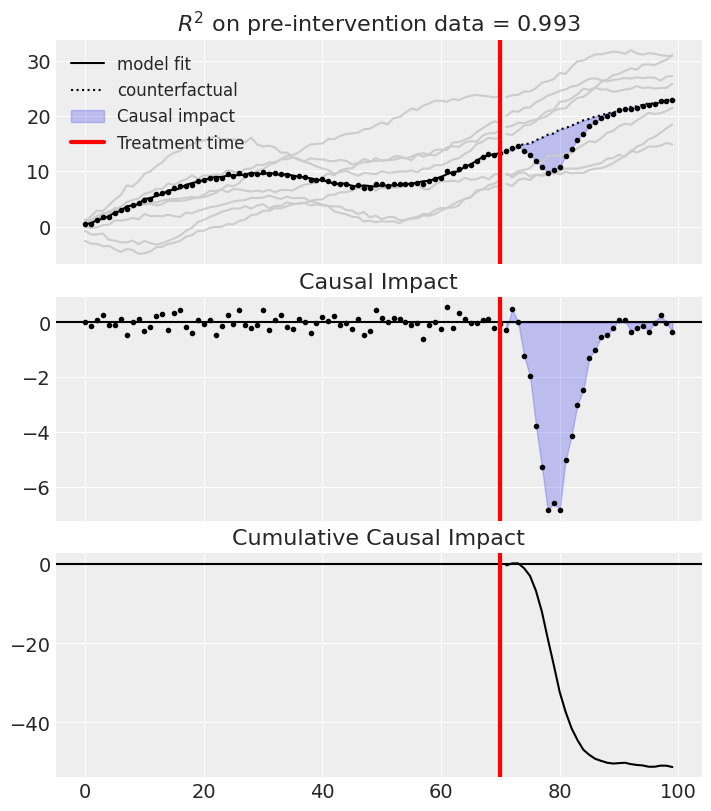

In [8]:
fig, ax = result.plot()

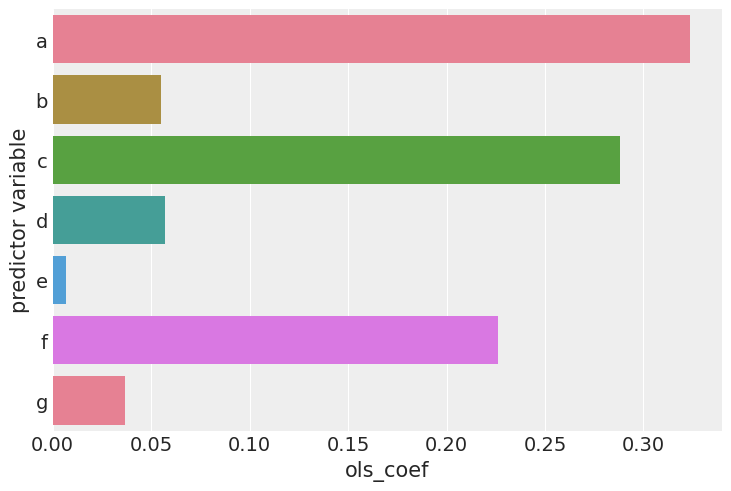

In [9]:
result.plot_coeffs()